In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
cd ..

/home/dhatri


In [3]:
cd Documents/UDEMY_TSA_FINAL/Data/

/home/dhatri/Documents/UDEMY_TSA_FINAL/Data


In [7]:
# load a seasonal dataset
df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq='MS'

# load a non seasonal dataset
df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq='D'

In [8]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

<Axes: xlabel='Month'>

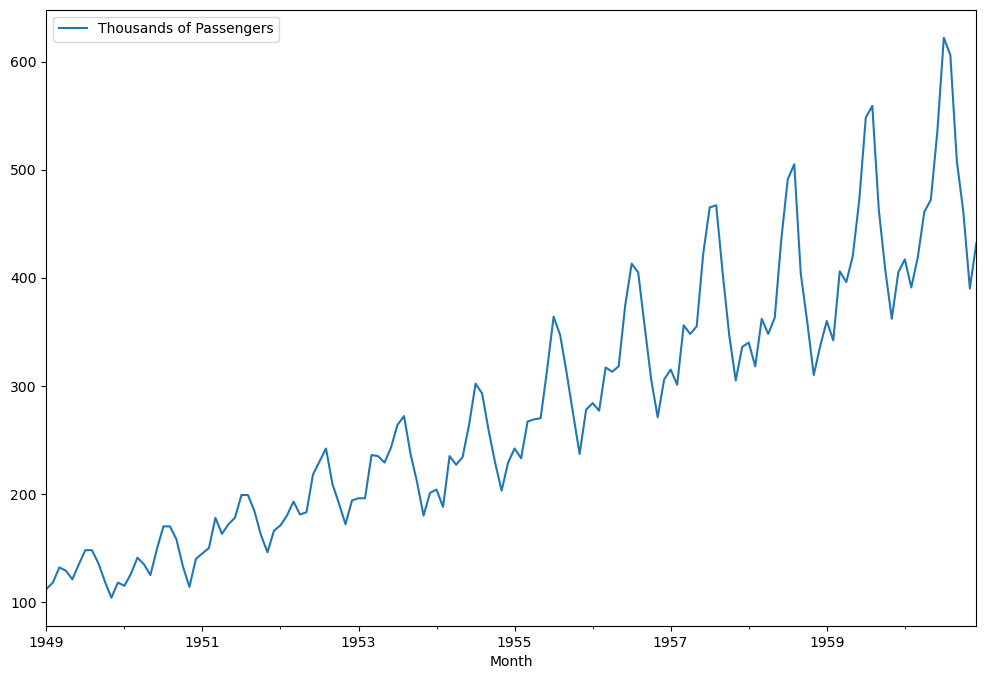

In [11]:
df1.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [14]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [19]:
dftest = adfuller(df1['Thousands of Passengers'].dropna())
dfout = pd.Series(dftest[0:4], index=['ADF test Statistic', 'p-value', '# Lags used', '# Observations'])

In [20]:
for key, val in dftest[4].items():
    dfout[f'critical value {(key)}'] = val

In [21]:
dfout

ADF test Statistic      0.815369
p-value                 0.991880
# Lags used            13.000000
# Observations        130.000000
critical value 1%      -3.481682
critical value 5%      -2.884042
critical value 10%     -2.578770
dtype: float64

<Axes: xlabel='Date'>

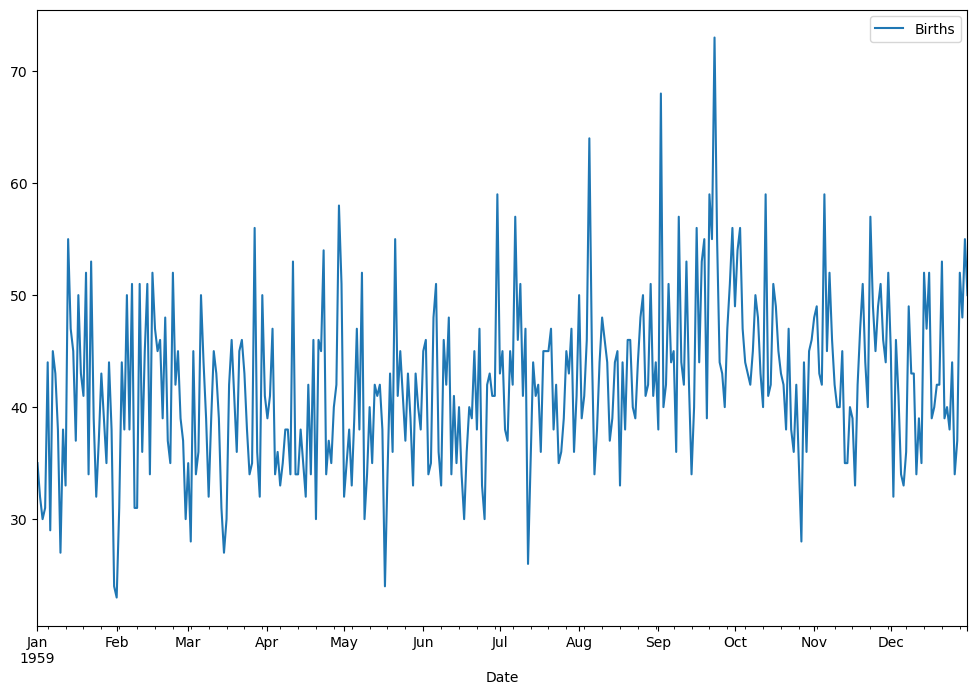

In [22]:
df2.plot()

In [24]:
if adfuller(df2['Births'].dropna())[1] < 0.05: 
    print('stationary')

stationary


In [25]:
df3 = pd.read_csv('samples.csv', index_col=0, parse_dates=True)

<Axes: >

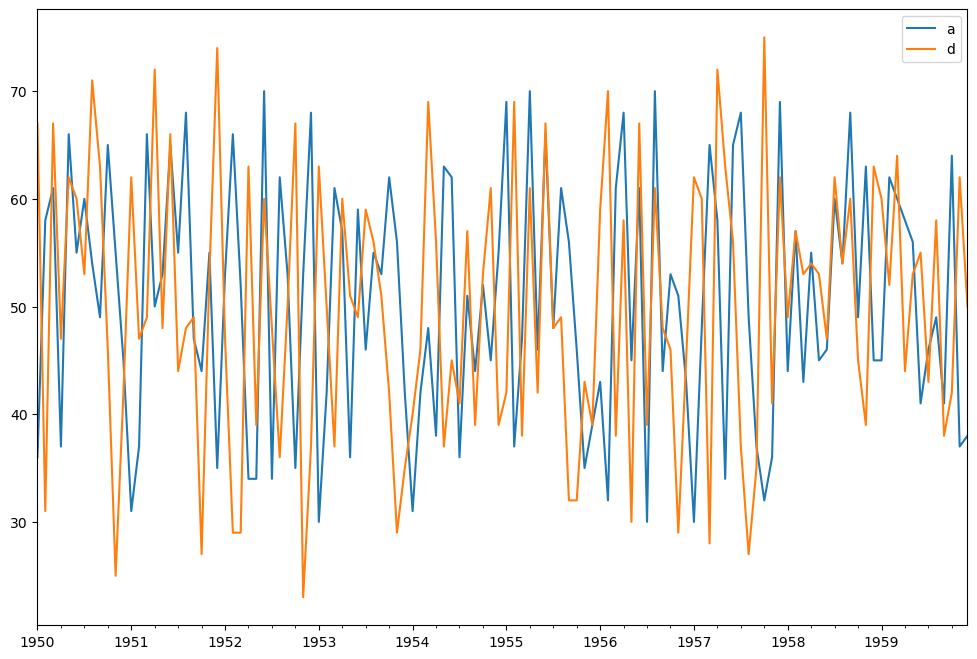

In [27]:
df3[['a', 'd']].plot()

<Axes: >

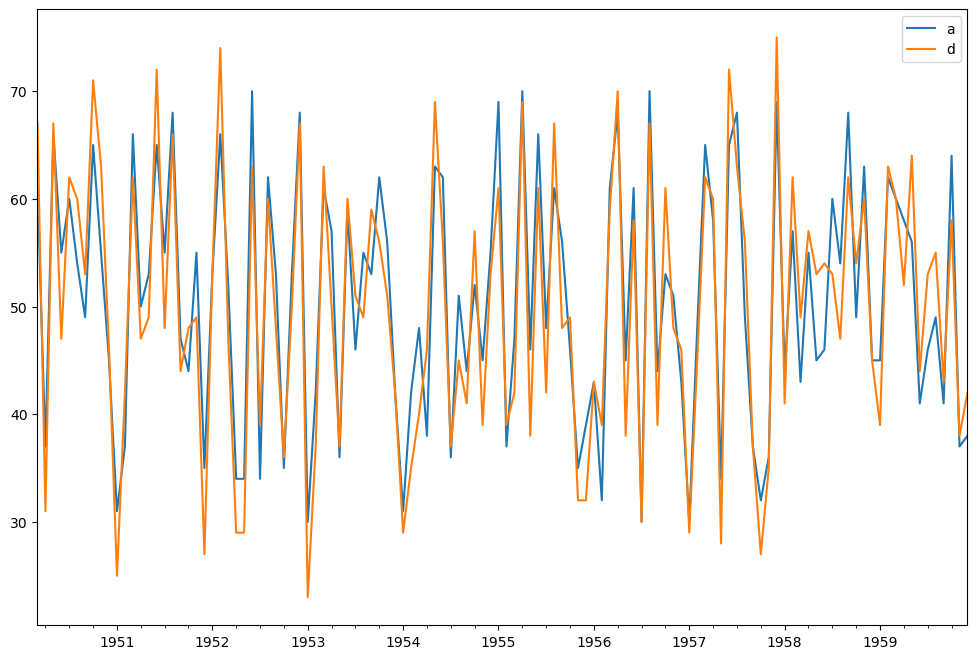

In [28]:
df3['a'].iloc[2:].plot(legend=True)
df3['d'].shift(2).iloc[2:].plot(legend=True)

In [29]:
from statsmodels.tsa.stattools import grangercausalitytests

In [32]:
grangercausalitytests(df3[['a', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [33]:
grangercausalitytests(df3[['b', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [38]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns=['test', 'predictions'])

In [39]:
df

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24
5,23,27
6,27,22
7,25,24
8,21,27
9,25,21


<Axes: >

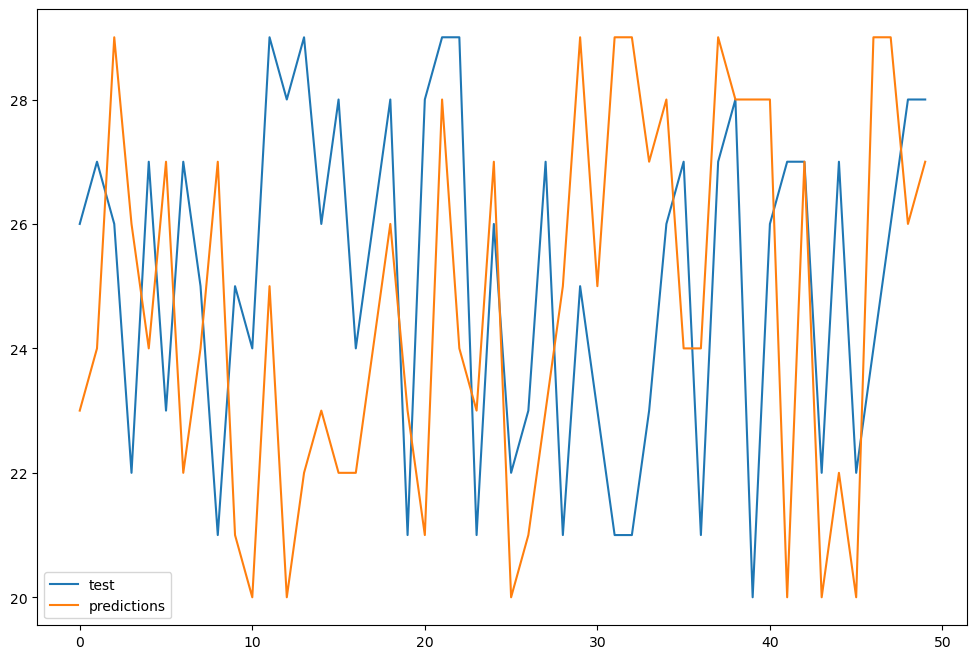

In [40]:
df.plot()

In [42]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [44]:
meanabs(df['test'], df['predictions'])

3.54

In [45]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [46]:
df.index.freq = 'MS'

In [47]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

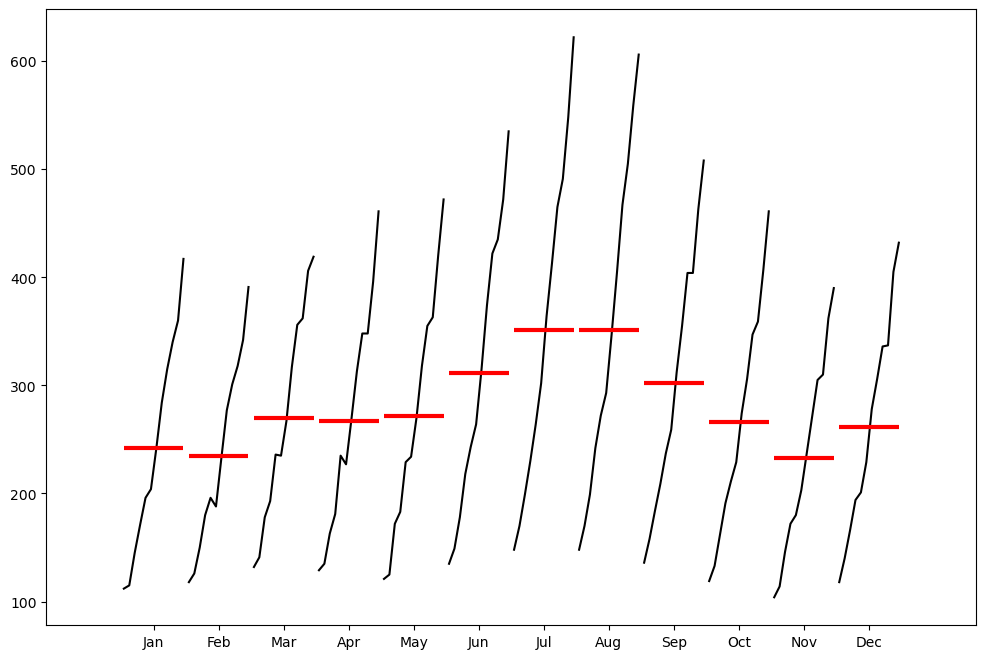

In [49]:
month_plot(df['Thousands of Passengers']);

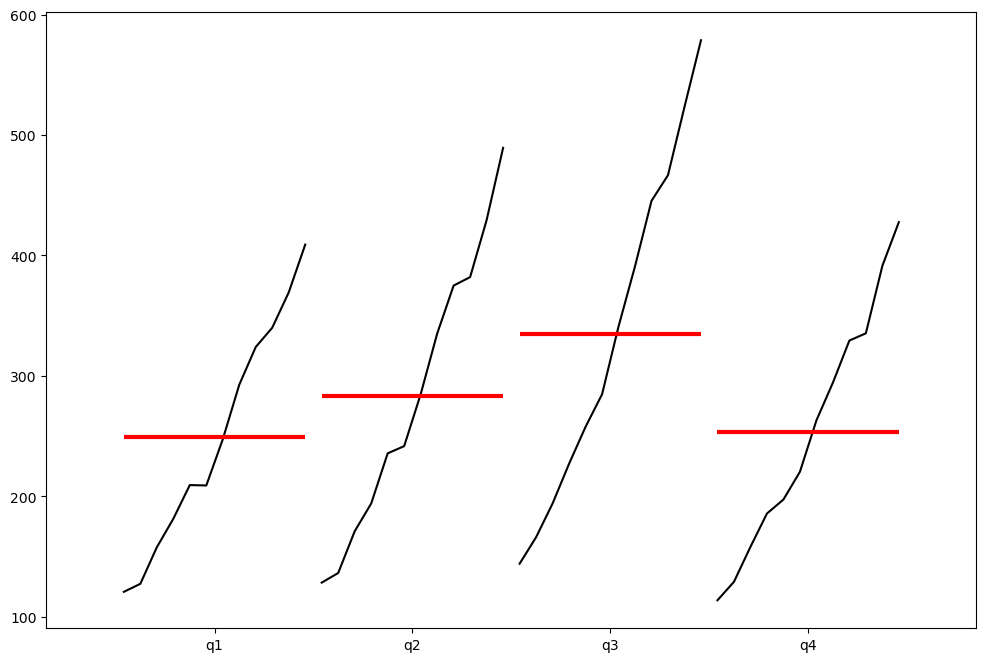

In [53]:
quarter_plot(df['Thousands of Passengers'].resample(rule='Q').mean());